## The third In-class-exercise (2/22/2022, 40 points in total)

The purpose of this exercise is to understand text representation.

Question 1 (10 points): Describe an interesting text classification or text mining task and explain what kind of features might be useful for you to build the machine learning model. List your features and explain why these features might be helpful. You need to list at least five different types of features.

In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

Employee attrition rate is used to describe the rate at which the employees are leaving an organisation.Employee attrition can 
occur due to various reasons.The reasons include employee retirals, finding better job opportunities, or leaving due to 
unsatisfied work environment etc.As an employer,it is important to understand Attrition as it can affect the productivity of the company 
and can also send bad signals to the new joiners.

The Dataset used in this assignment is a fictional Employee Attrition dataset created by IBM and deployed into kaggle.
It contains many attributes of the employee and their relation to Attrition.

The Most important features in the Dataset likely to affect the outcome are:
1.Job Satisfction
2.Job Role
3.Environment Satisfaction
4.Overtime
5.Work Life Balance
6.Years Without Promotion
7.Compensation
8.Department

Based on the above features, we can predict if the employee is likely to leave the organisation and can take necessary actions 
to retain the employees. It is a Realtime problem that is being faced ny the organisations all over the world and it is really Intresting to 
know how important each of these factors is.



'''


'\nPlease write you answer here:\n\nEmployee attrition rate is used to describe the rate at which the employees are leaving an organisation.Employee attrition can \noccur due to various reasons.The reasons include employee retirals, finding better job opportunities, or leaving due to \nunsatisfied work environment etc.As an employer,it is important to understand Attrition as it can affect the productivity of the company \nand can also send bad signals to the new joiners.\n\nThe Dataset used in this assignment is a fictional Employee Attrition dataset created by IBM and deployed into kaggle.\nIt contains many attributes of the employee and their relation to Attrition.\n\nThe Most important features in the Dataset likely to affect the outcome are:\n1.Job Satisfction\n2.Job Role\n3.Environment Satisfaction\n4.Overtime\n5.Work Life Balance\n6.Years Without Promotion\n7.Compensation\n8.Department\n\nBased on the above features, we can predict if the employee is likely to leave the organisat

In [ ]:
import pandas as pd
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df['Cause']=''
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Cause
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,


In [ ]:
for ind in df.index:
  if df['Attrition'][ind]=="Yes":
    if df['MonthlyIncome'][ind]<2000:
      df['Cause'][ind]="Low Income"
    elif df['MonthlyIncome'][ind]<5500:
      df['Cause'][ind]="Medium Income"
    elif df['MonthlyIncome'][ind]>5500:
      df['Cause'][ind]="High Income"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Cause
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,High Income
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Medium Income
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,


In [ ]:
df['Cause'][0]

'High Income'

In [ ]:
df['Cause'][0]

'High Income'

Question 3 (10 points): Use any of the feature selection methods mentioned in this paper "Deng, X., Li, Y., Weng, J., & Zhang, J. (2019). Feature selection for text classification: A review. Multimedia Tools & Applications, 78(3)." Select the most important features you extracted above, rank the features based on their importance in the descending order. 

In [ ]:
# You code here (Please add comments in the code):
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
import pandas as pd

data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')


In [ ]:
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
data['Attrition'].replace('No',0,inplace=True)
data['Attrition'].replace('Yes',1,inplace=True)
data['Over18'].replace('Y',1,inplace=True)
data['Over18'].replace('N',0,inplace=True)
data['OverTime'].replace('Yes',1,inplace=True)
data['OverTime'].replace('No',0,inplace=True)
data['JobRole'].replace('Sales Executive',1,inplace=True)
data['JobRole'].replace('Research Scientist',2,inplace=True)
data['JobRole'].replace('Laboratory Technician',3,inplace=True)
data['JobRole'].replace('Manufacturing Director',4,inplace=True)
data['JobRole'].replace('Healthcare Representative',5,inplace=True)
data['JobRole'].replace('Manager',6,inplace=True)
data['JobRole'].replace('Sales Representative',7,inplace=True)
data['JobRole'].replace('Research Director',8,inplace=True)
data['JobRole'].replace('Human Resources',9,inplace=True)
data['MaritalStatus'].replace('Married',1,inplace=True)
data['MaritalStatus'].replace('Single',2,inplace=True)
data['MaritalStatus'].replace('Divorced',3,inplace=True)
data['Gender'].replace('Male',1,inplace=True)
data['Gender'].replace('Female',2,inplace=True)
data['BusinessTravel'].replace('Travel_Rarely',1,inplace=True)
data['BusinessTravel'].replace('Travel_Frequently',2,inplace=True)
data['BusinessTravel'].replace('Non-Travel',3,inplace=True)
data['Department'].replace('Research & Development',1,inplace=True)
data['Department'].replace('Sales',2,inplace=True)
data['Department'].replace('Human Resources',3,inplace=True)
data['EducationField'].replace('Medical',1,inplace=True)
data['EducationField'].replace('Marketing',2,inplace=True)
data['EducationField'].replace('Other',3,inplace=True)
data['EducationField'].replace('Life Sciences',4,inplace=True)
data['EducationField'].replace('Technical Degree',5,inplace=True)
data['EducationField'].replace('Human Resources',6,inplace=True)


In [ ]:
x=data.iloc[:,2:]
y=data.iloc[:,1]
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [ ]:
y.describe()

count    1470.000000
mean        0.161224
std         0.367863
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Attrition, dtype: float64

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished

[2022-03-03 04:59:29] Features: 1/10 -- score: 0.8387755102040816[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.2s finished

[2022-03-03 04:59:29] Features: 2/10 -- score: 0.8387755102040816[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.5s finished

[2022-03-03 04:59:30] Features: 3/10 -- score: 0.8387755102040816[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

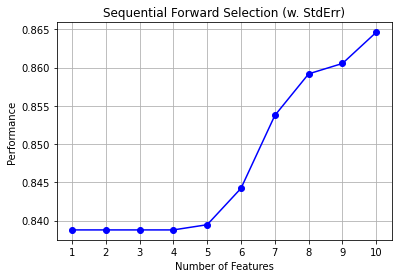

In [ ]:
sfs1 = SFS(LogisticRegression(), 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           
           cv=0)
#Use SFS to select the top 5 features 
feature_names=x.columns
sfs1 = sfs1.fit(x, y,custom_feature_names=feature_names)


from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig = plot_sfs(sfs1.get_metric_dict(), kind='std_err')
import matplotlib.pyplot as plt
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
df_SFFS_results = pd.DataFrame(sfs1.subsets_).transpose()
df_SFFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(0,)",[0.8387755102040816],0.838776,"(BusinessTravel,)"
2,"(0, 1)",[0.8387755102040816],0.838776,"(BusinessTravel, DailyRate)"
3,"(0, 1, 2)",[0.8387755102040816],0.838776,"(BusinessTravel, DailyRate, Department)"
4,"(0, 1, 2, 3)",[0.8387755102040816],0.838776,"(BusinessTravel, DailyRate, Department, Distan..."
5,"(0, 1, 2, 3, 11)",[0.8394557823129252],0.839456,"(BusinessTravel, DailyRate, Department, Distan..."
6,"(0, 1, 2, 3, 11, 26)",[0.8442176870748299],0.844218,"(BusinessTravel, DailyRate, Department, Distan..."
7,"(0, 1, 2, 3, 11, 20, 26)",[0.8537414965986394],0.853741,"(BusinessTravel, DailyRate, Department, Distan..."
8,"(0, 1, 2, 3, 11, 14, 20, 26)",[0.8591836734693877],0.859184,"(BusinessTravel, DailyRate, Department, Distan..."
9,"(0, 1, 2, 3, 8, 11, 14, 20, 26)",[0.8605442176870748],0.860544,"(BusinessTravel, DailyRate, Department, Distan..."
10,"(0, 1, 2, 3, 8, 11, 14, 18, 20, 26)",[0.8646258503401361],0.864626,"(BusinessTravel, DailyRate, Department, Distan..."


In [ ]:
sfs1.k_feature_names_

('BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'OverTime',
 'TotalWorkingYears')